导入所需库
###### 导入了深度学习项目所需的各种 Python 库，包括用于数据处理、数值计算、数据可视化以及 PyTorch 深度学习框架的模块。

In [49]:
# 从 google.colab 库中导入 drive 模块
# 这个模块用于在 Google Colab 环境中挂载 Google Drive，以便访问存储在云端的文件。
from google.colab import drive

# 导入 pandas 库，通常简写为 pd
# pandas 是 Python 中用于数据处理和分析的强大库，主要提供 DataFrame 对象，便于处理表格型数据。
import pandas as pd

# 导入 numpy 库，通常简写为 np
# numpy 是 Python 进行科学计算的基础库，提供了高性能的多维数组对象和大量的数学函数。
import numpy as np

# 导入 matplotlib.pyplot 模块，通常简写为 plt
# matplotlib 是 Python 的绘图库，pyplot 模块提供了类似于 MATLAB 的绘图接口，用于创建静态、动态、交互式图表。
import matplotlib.pyplot as plt

# 导入 seaborn 库，通常简写为 sns
# seaborn 是基于 matplotlib 的高级数据可视化库，提供了更美观、信息更丰富的统计图形。
import seaborn as sns

# 导入 torch 库，这是 PyTorch 深度学习框架的核心库
# PyTorch 是一个开源的机器学习库，广泛用于计算机视觉和自然语言处理等深度学习任务。
import torch

# 从 torch 库中导入 nn 模块
# nn (neural networks) 模块提供了构建神经网络所需的各种层（如全连接层、卷积层）、激活函数等组件。
from torch import nn

# 从 torch 库中导入 optim 模块
# optim (optimizer) 模块包含了各种优化算法（如 SGD, Adam），用于在训练过程中更新模型的权重。
from torch import optim

# 从 sklearn.preprocessing 模块中导入 MinMaxScaler
# MinMaxScaler 用于将特征缩放到一个指定的范围（通常是 0 到 1），这对于神经网络训练非常重要，可以帮助模型更快收敛。
from sklearn.preprocessing import MinMaxScaler

挂载 Google Drive
###### 此代码块执行 Google Drive 的挂载操作，连接 Colab 环境到用户的 Google Drive。

In [50]:
# 调用 drive 模块的 mount 方法，将 Google Drive 挂载到 Colab 的文件系统。
# '/content/gdrive' 是在 Colab 虚拟机中创建的挂载点。
# 运行此行代码后，会弹出一个认证链接，用户需点击链接授权并输入验证码以完成挂载。
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 获取数据

读取数据与初步清洗
###### 此代码块从 Google Drive 读取原始电力负荷数据，并进行初步的列删除操作。

In [51]:
# 使用 pandas 的 read_csv() 函数从指定的 Google Drive 路径读取 CSV 文件。
# 读取的数据被加载到一个名为 `new_data` 的 pandas DataFrame 中。
new_data = pd.read_csv("/content/gdrive/MyDrive/ElectricPowerTraining/data/new_data.csv")

# 删除 DataFrame 中指定的列。
# 'Unnamed: 0' 通常是 CSV 文件在保存时自动生成的索引列，对分析无用。
# 'light', 'wind_speed', 'wind_direction_angle', 'weather_status', 'precipitation' 这些特征
# 根据之前的分析（可能来自 `决策树.ipynb`），被认为是相对不重要或可能引入噪声的特征，因此在此阶段被移除。
# `axis=1` 参数表示按列删除。
new_data = new_data.drop(['Unnamed: 0', 'light', 'wind_speed', 'wind_direction_angle', 'weather_status', 'precipitation'], axis=1)

# 打印 DataFrame `new_data` 的详细信息。
# `info()` 方法会显示每列的名称、非空值数量、数据类型以及整个 DataFrame 的内存使用情况，
# 用于快速了解数据的概况和检查是否存在缺失值。
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75552 entries, 0 to 75551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   value        75552 non-null  float64
 1   temperature  75552 non-null  float64
 2   humidity     75552 non-null  float64
 3   pressure     75552 non-null  float64
 4   visibility   75552 non-null  float64
 5   holiday      75552 non-null  float64
 6   minute       75552 non-null  float64
 7   week         75552 non-null  float64
 8   year         75552 non-null  float64
dtypes: float64(9)
memory usage: 5.2 MB


数据类型转换
###### 此代码块将 DataFrame 中所有列的数据类型统一转换为 float32，以优化内存使用和提高计算效率。

In [52]:
# 使用 `astype(np.float32)` 方法将 DataFrame `new_data` 中所有列的数据类型转换为 NumPy 的 float32 类型。
# float32 相比默认的 float64 占用更少的内存，在处理大型数据集和深度学习任务时有助于节省资源和加速运算。
new_data = new_data.astype(np.float32)

# 再次打印 DataFrame `new_data` 的详细信息。
# 此时可以看到所有数值列的数据类型已成功更改为 `float32`，并可能观察到内存占用量的变化。
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75552 entries, 0 to 75551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   value        75552 non-null  float32
 1   temperature  75552 non-null  float32
 2   humidity     75552 non-null  float32
 3   pressure     75552 non-null  float32
 4   visibility   75552 non-null  float32
 5   holiday      75552 non-null  float32
 6   minute       75552 non-null  float32
 7   week         75552 non-null  float32
 8   year         75552 non-null  float32
dtypes: float32(9)
memory usage: 2.6 MB


2021年、2022年、2023年年初电力负荷均出现了明显的先下降后上升过程，但原因不明，需要和电力公司沟通，了解原因。因此在模型训练和测试时选择将这段时间的数据忽略。

删去2021-1-21到2021-2-6，2022-2-9到2022-2-24，2023-1-26到2023-2-13的数据

删除特定时间段的异常数据
###### 此代码块根据上一个 Markdown 单元格中说明的日期范围，计算并删除 new_data 中对应索引的行。

In [53]:
# 定义一个列表 `drop_index`，包含所有需要删除的行的索引。
# 这些索引范围对应着 Markdown 单元格中提到的具有异常负荷模式的时间段。
# `range(start, end)` 函数会生成一个从 `start` 到 `end-1` 的整数序列。
drop_index = [i for i in range(1920, 3552)] + \
             [i for i in range(38784, 40320)] + \
             [i for i in range(72480, 74304)]

# 使用 `drop()` 方法从 DataFrame `new_data` 中删除 `drop_index` 列表中的所有行。
# `axis=0` 表示按行删除（默认为行，此处可省略）。
# 删除操作会返回一个新的 DataFrame，因此需要重新赋值给 `new_data`。
new_data = new_data.drop(drop_index, axis=0)

# 再次打印 DataFrame `new_data` 的详细信息。
# 此时可以看到 DataFrame 的行数已经减少，反映了异常数据的成功删除。
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70560 entries, 0 to 75551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   value        70560 non-null  float32
 1   temperature  70560 non-null  float32
 2   humidity     70560 non-null  float32
 3   pressure     70560 non-null  float32
 4   visibility   70560 non-null  float32
 5   holiday      70560 non-null  float32
 6   minute       70560 non-null  float32
 7   week         70560 non-null  float32
 8   year         70560 non-null  float32
dtypes: float32(9)
memory usage: 3.0 MB


划分训练集和测试集。2021年、2022年前11个月和2023年的数据作为训练集，2022年12月的数据作为测试集

数据集划分
###### 此代码块根据上一个 Markdown 单元格中定义的策略，将 new_data DataFrame 划分为训练集 (train) 和测试集 (test)。

In [54]:
# 划分训练集和测试集。
# 训练集 `train` 通过 `pd.concat()` 方法将多段非连续的数据合并。
# 这反映了为了使模型更好地学习年份特征，将不同年份的特定时间段数据组合作为训练集。
train = pd.concat([new_data.loc[:67103], new_data.loc[70080:]], axis=0)

# 测试集 `test` 被定义为 `new_data` 中的一个特定时间段（2022年12月）。
# 这种划分方式旨在评估模型对一个完整且近期时间段的预测能力。
test = new_data.loc[67104:70079]

# 打印训练集和测试集的样本数量（行数）。
# 这用于快速确认数据划分是否符合预期。
print(len(train))
print(len(test))

67584
2976


In [55]:
train1 = new_data.loc[:1919]
train2 = new_data.loc[3552:38783]
train3 = new_data.loc[40320:67103]
train4 = new_data.loc[70080:72479]
train5 = new_data.loc[74304:]
test = new_data.loc[67104:70079]

In [56]:
train = pd.concat([new_data.loc[:67103], new_data.loc[70080:]], axis=0)

In [57]:
print(len(train))
print(len(test))

67584
2976


对训练集数据归一化

数据归一化
###### 此代码块使用 MinMaxScaler 对训练数据进行归一化处理。

In [58]:
# 初始化 MinMaxScaler。
# MinMaxScaler 会将数据缩放到指定的最小值和最大值之间（默认是 0 到 1）。
scaler = MinMaxScaler()

# 使用训练集 `train` 来拟合 MinMaxScaler。
# `fit()` 方法会计算训练集中每个特征的最大值和最小值，这些值将在后续的转换中使用。
scaler = scaler.fit(train)

# 打印 `scaler` 对象。
# 这会显示 `MinMaxScaler` 对象的内存地址和一些基本信息，表明它已经被成功实例化并拟合。
scaler

MinMaxScaler()

废弃的训练集归一化代码
###### 此单元格包含了一些未被使用的训练集归一化代码，可能是在开发过程中测试不同数据分割方法时留下的。

In [59]:
# -------------------- 注意：以下几行代码在实际执行中可能被注释或未被使用 --------------------
# 它们可能是早期数据分割和归一化尝试的遗留。

# 对各个训练集部分进行归一化（尽管 `train` 已经被合并，这些单独的 `trainX_result` 变量未在后续使用）
# `transform()` 方法使用 `fit()` 阶段计算出的 min/max 值来对数据进行缩放。
train_result1 = scaler.transform(train1) # 对 train1 部分归一化
train_result2 = scaler.transform(train2) # 对 train2 部分归一化
train_result3 = scaler.transform(train3) # 对 train3 部分归一化
train_result4 = scaler.transform(train4) # 对 train4 部分归一化
train_result5 = scaler.transform(train5) # 对 train5 部分归一化

# 打印归一化后各个训练集部分的形状。
# `shape` 属性返回 NumPy 数组的维度，例如 (行数, 列数)。
train_result1.shape
train_result2.shape
train_result3.shape
train_result4.shape
train_result5.shape

(1248, 9)

生成训练数据

定义序列生成函数并计算特征维度
###### 此单元格定义了一个核心函数 create_inout_sequences，用于将时间序列数据转换为神经网络所需的输入-输出序列格式。它还计算了模型的输入特征总维度。

In [60]:
# 定义函数 `create_inout_sequences`，用于生成神经网络训练所需的输入-输出序列。
# `input_data`: 归一化后的原始时间序列数据 (NumPy 数组)。
# `tw`: 时间窗口 (time window) 大小，表示用于预测的序列总长度。
def create_inout_sequences(input_data, tw):
    inout_seq = [] # 用于存储生成的输入-输出序列对。
    L = len(input_data) # 获取输入数据的总长度 (行数)。

    # 遍历数据，按时间窗口 `tw` 提取序列。
    # `L - tw + 1` 确保在提取序列时不会超出数据范围。
    for i in range(L - tw + 1):
        # 提取前 `tw - 96` 个时刻的数据作为历史输入。
        # `.reshape(-1)` 将多维数组展平为一维数组，以便作为神经网络的输入。
        # 假设原始数据每行包含负荷值和多个特征。
        m = input_data[i : i + tw - 96].reshape(-1)

        # 提取后 96 个时刻的气象数据（不包括负荷值）作为未来特征。
        # `[:, 1:]` 表示选取所有行，但从第二列（索引1）开始到最后一列，即跳过负荷值。
        # `.reshape(-1)` 同样将数据展平。
        n = input_data[i + tw - 96 : i + tw, 1:].reshape(-1)

        # 将历史输入 `m` 和未来特征 `n` 沿轴 0 (垂直方向) 拼接，形成一个完整的输入特征序列。
        seq = np.concatenate((m, n), axis=0)

        # 提取后 96 个时刻的负荷值作为标签（即预测目标）。
        # `[:, 0]` 表示选取所有行，但只选取第一列（索引0），即负荷值。
        label = input_data[i + tw - 96 : i + tw, 0]

        # 将生成的特征序列 `seq` 和标签 `label` 转换为 PyTorch 张量，并作为元组添加到 `inout_seq` 列表中。
        # PyTorch 张量是 PyTorch 框架中进行计算的基本数据结构。
        inout_seq.append((torch.tensor(seq), torch.tensor(label)))
    return inout_seq

# 计算神经网络模型的输入特征总维度。
# 这个计算基于 `create_inout_sequences` 函数中特征的拼接方式。
# 假设每个时刻有 9 个特征 (1个负荷 + 8个气象特征)
# 历史输入部分：(tw - 96) 个时刻 * 9 个特征
# 未来特征部分：96 个时刻 * 8 个气象特征 (不含负荷)
# 所以总维度 = (tw - 96) * 9 + 96 * 8
# 如果 `tw` 设为 192 (如下面代码所示)，则：
# (192 - 96) * 9 + 96 * 8 = 96 * 9 + 96 * 8 = 96 * (9 + 8) = 96 * 17 = 1632。
96 * 9 + 96 * 8 # 这个表达式直接计算了结果 1632。

1632

生成训练序列
###### 此单元格使用 create_inout_sequences 函数为各个训练数据段生成输入-输出序列，并将它们合并。

In [61]:
# 使用 `create_inout_sequences` 函数为 `train_result1` 数据段生成序列。
# `192` 是时间窗口的大小，表示用于预测的序列总长度。
train_seq1 = create_inout_sequences(train_result1, 192)
train_seq2 = create_inout_sequences(train_result2, 192)
train_seq3 = create_inout_sequences(train_result3, 192)
train_seq4 = create_inout_sequences(train_result4, 192)
train_seq5 = create_inout_sequences(train_result5, 192)

# 将所有单独生成的训练序列列表合并成一个大的训练序列列表 `train_seq`。
# 这是因为原始数据被分割成多段进行处理，现在需要将它们组合起来用于模型的整体训练。
train_seq = train_seq1 + train_seq2 + train_seq3 + train_seq4 + train_seq5

# 打印合并后训练序列的总长度（即训练样本的数量）。
len(train_seq)

66629

生成测试数据

生成测试序列
###### 此单元格对测试集数据进行归一化，并使用 create_inout_sequences 函数生成测试所需的输入-输出序列。

In [62]:
# 对测试集 `test` 数据进行归一化。
# 使用在训练集上 `fit()` 好的 `scaler` 对象来 `transform()` 测试集，
# 确保测试集使用与训练集相同的缩放参数，防止数据泄露。
test_result = scaler.transform(test)

# 使用 `create_inout_sequences` 函数为归一化后的测试数据 `test_result` 生成序列。
# `192` 同样是时间窗口大小。
test_seq = create_inout_sequences(test_result, 192)

# 打印测试序列的总长度（即测试样本的数量）。
len(test_seq)

2785

训练样本的数量为66629，每个训练样本包括特征和标签，其中特征为前96个时刻数据（包括负荷值和特征）和后96个时刻的气象数据，标签为后96个时刻的负荷值。

使用前24小时和未来24小时的数据预测未来24小时的负荷

设置批量大小为128

创建数据加载器并检查批次数据形状
###### 创建了 PyTorch 的 DataLoader，用于高效地批量加载训练数据，并验证了单个批次数据的形状。

In [63]:
# 创建 PyTorch 的 `DataLoader`。
# `train_seq`: 要加载的数据集，这里是之前生成的训练序列列表。
# `batch_size=128`: 每批次加载 128 个样本。批量训练有助于稳定梯度和加速训练。
# `shuffle=True`: 在每个 epoch 开始时打乱数据，有助于防止模型过拟合到数据的顺序，提高泛化能力。
trainloader = torch.utils.data.DataLoader(train_seq, batch_size=128, shuffle=True)

# 打印训练数据加载器的长度。
# 对于 PyTorch 的 DataLoader，`len()` 返回的是批次（batch）的数量，而不是样本的数量。
len(trainloader)

# 迭代 `trainloader` 的第一个批次，并打印输入 `xb` 和标签 `yb` 的形状。
# `break` 用于在获取第一个批次后立即退出循环，只查看一个批次的形状。
# `xb.shape` 应为 `(batch_size, input_feature_dimension)`，即 `(128, 1632)`。
# `yb.shape` 应为 `(batch_size, output_label_dimension)`，即 `(128, 96)`。
for xb, yb in trainloader:
    print(xb.shape) # 打印输入特征张量的形状
    print(yb.shape) # 打印标签张量的形状
    break

torch.Size([128, 1632])
torch.Size([128, 96])


### 建立全连接神经网络模型并训练

定义全连接神经网络模型 (FCNN)
###### 定义了一个简单的全连接神经网络（FCNN）模型，它继承自 PyTorch 的 nn.Module。

In [64]:
# 定义 FCNN (Fully Connected Neural Network) 类，继承自 PyTorch 的 nn.Module。
# nn.Module 是所有神经网络模块的基类，定义了模型的基本结构和行为。
class FCNN(nn.Module):
    # 构造函数：在创建模型实例时被调用。
    def __init__(self):
        # 调用父类 nn.Module 的构造函数，这是 PyTorch 模型定义的标准做法。
        super().__init__()
        # 定义神经网络的层序列。nn.Sequential 是一个容器，按顺序包含子模块。
        self.layers = nn.Sequential(
            # 第一个全连接层：从输入层到隐藏层。
            # `nn.Linear(in_features, out_features)`：表示一个线性变换，即 y = xA^T + b。
            # 1632 是输入特征的维度（与之前计算的 `96 * 9 + 96 * 8` 对应）。
            # 1000 是隐藏层的输出特征维度（即神经元数量）。
            nn.Linear(1632, 1000),
            # 激活函数：LeakyReLU。
            # LeakyReLU(x) = x (当 x > 0 时)；LeakyReLU(x) = negative_slope * x (当 x <= 0 时)。
            # 相比 ReLU，它在负值区域有一个小的斜率，有助于避免“神经元死亡”问题。
            nn.LeakyReLU(),
            # 第二个全连接层：从隐藏层到输出层。
            # 1000 是隐藏层的输入特征维度。
            # 96 是输出特征维度，对应于模型需要预测的未来 96 个时刻的电力负荷值。
            nn.Linear(1000, 96)
        )

    # 前向传播函数：定义数据如何通过网络从输入流向输出。
    # `x`: 输入张量。
    def forward(self, x):
        # 数据通过定义好的层序列进行前向传播计算。
        y = self.layers(x)
        # 返回网络的输出。
        return y

模型实例化、优化器和损失函数定义
###### 实例化了 FCNN 模型，并设置了学习率、优化器和损失函数，这些都是训练神经网络的关键组件。

In [65]:
# 实例化 FCNN 模型。
# 这会创建一个 FCNN 类的对象，并调用其 `__init__` 方法来初始化网络层。
fcnn = FCNN()

# 设置学习率（learning rate）。
# 学习率控制了模型在每次参数更新时，沿损失函数梯度方向移动的步长大小。
# 较小的学习率通常能更稳定地收敛，但训练速度可能较慢。
lr = 0.00001

# 定义优化器：Adam 优化器。
# `optim.Adam()` 是一个常用的自适应学习率优化算法，通常在实践中表现良好。
# `fcnn.parameters()`：将模型 `fcnn` 中所有可学习的参数（权重和偏置）传递给优化器。
# `lr=lr`：指定优化器使用的学习率。
opt = optim.Adam(fcnn.parameters(), lr=lr)

# 定义损失函数：均方误差损失 (MSELoss)。
# `nn.MSELoss()` 用于回归任务，它计算预测值和真实值之间差的平方的平均值。
# 目标是最小化此损失函数。
loss_function = nn.MSELoss()

# 创建一个空列表，用于存储每个训练批次的损失值。
# 这可以用于后续分析训练过程中的损失变化曲线。
loss_list = []

模型训练循环
###### 包含了神经网络的训练循环，模型会在此循环中通过多个 epoch 和批次迭代来学习数据。

In [66]:
# 定义训练的轮数 (epochs)。
# 一个 epoch 表示模型对整个训练数据集完成了一次完整的遍历。
epochs = 1

# 开始训练循环。
for epoch in range(epochs):
    i = 0 # 初始化批次计数器。
    # 遍历 `trainloader`，获取每个批次的输入特征 `xb` 和标签 `yb`。
    for xb, yb in trainloader:
        # 前向传播：将输入特征 `xb` 传递给模型 `fcnn`，得到预测值 `y`。
        y = fcnn(xb)
        # 计算损失：使用定义的损失函数 `loss_function` 比较预测值 `y` 和真实标签 `yb`。
        loss = loss_function(y, yb)
        # 记录当前批次的损失值。`.data` 用于获取张量中的实际数据，避免创建计算图的引用。
        loss_list.append(loss.data)
        # 反向传播：计算损失相对于模型参数的梯度。
        loss.backward()
        # 更新模型参数：优化器根据计算出的梯度更新模型的权重和偏置。
        opt.step()
        # 梯度清零：在下一个批次的反向传播之前，将所有参数的梯度清零。
        # 这是 PyTorch 的标准做法，因为梯度会累积。
        opt.zero_grad()
        i += 1 # 增加批次计数器。
        # 每处理 10 个批次，打印一次当前批次的损失值。
        # 这有助于监控训练进度和损失是否在下降。
        if i % 10 == 0:
            print(loss.data)

tensor(0.2701)
tensor(0.1971)
tensor(0.1510)
tensor(0.1081)
tensor(0.0742)
tensor(0.0574)
tensor(0.0409)
tensor(0.0350)
tensor(0.0333)
tensor(0.0317)
tensor(0.0297)
tensor(0.0257)
tensor(0.0276)
tensor(0.0252)
tensor(0.0247)
tensor(0.0244)
tensor(0.0242)
tensor(0.0235)
tensor(0.0216)
tensor(0.0207)
tensor(0.0206)
tensor(0.0192)
tensor(0.0192)
tensor(0.0202)
tensor(0.0173)
tensor(0.0173)
tensor(0.0175)
tensor(0.0176)
tensor(0.0175)
tensor(0.0155)
tensor(0.0162)
tensor(0.0149)
tensor(0.0146)
tensor(0.0141)
tensor(0.0127)
tensor(0.0140)
tensor(0.0120)
tensor(0.0130)
tensor(0.0124)
tensor(0.0129)
tensor(0.0118)
tensor(0.0113)
tensor(0.0120)
tensor(0.0117)
tensor(0.0127)
tensor(0.0102)
tensor(0.0093)
tensor(0.0111)
tensor(0.0105)
tensor(0.0096)
tensor(0.0100)
tensor(0.0095)


尽量使MAPE降到5%以下

### 预测

获取反归一化所需的最大/最小值
###### 获取训练集中 value 列（即负荷值）的最大值和最小值，这些值将用于将模型的预测结果从归一化范围还原到原始数据范围。

In [67]:
# 获取训练集 `train` 中 'value' 列的最大值。
# 这个最大值将与 `v_min` 一起用于反归一化模型输出，将其转换回原始负荷值的量纲。
v_max = max(train['value'])
# 获取训练集 `train` 中 'value' 列的最小值。
v_min = min(train['value'])

预测测试集里的某一样本

定义绘图函数
###### 定义了一个名为 picture 的函数，用于可视化模型的预测结果、真实值以及前一天的历史负荷数据。

In [90]:
# 设置 matplotlib 的默认字体为 'DengXian' (等线)。
# 这确保了图表中的中文文本能够正确显示。
plt.rc('font', family='DengXian')

# 定义绘图函数 `picture`。
# `data`: 输入的序列数据（例如 `test_seq` 或 `train_seq`）。
# `index`: 要绘制的样本在 `data` 列表中的索引。
def picture(data, index):
    # 使用训练好的模型 `fcnn` 对指定样本的输入特征进行预测。
    # `data[index][0]` 获取第 `index` 个样本的输入特征张量。
    pred = fcnn(data[index][0])

    # 反归一化真实标签（真实负荷值）。
    # `data[index][1]` 获取第 `index` 个样本的真实标签张量。
    # 反归一化公式：原始值 = 归一化值 * (最大值 - 最小值) + 最小值。
    true_label = data[index][1] * (v_max - v_min) + v_min
    # 将 PyTorch 张量转换为 NumPy 数组，以便使用 matplotlib 绘图。
    true_label = true_label.detach().numpy()

    # 反归一化预测结果。
    # `pred` 是模型输出的归一化预测张量。
    true_pred = pred * (v_max - v_min) + v_min
    # 将 PyTorch 张量转换为 NumPy 数组。
    true_pred = true_pred.detach().numpy()

    # 反归一化“前一天”的负荷数据（作为参考）。
    # 这里假设 `data[index - 96][1]` 对应的是预测时刻前 24 小时的负荷值（96个点代表24小时）。
    before_day = data[index - 96][1] * (v_max - v_min) + v_min
    # 将 PyTorch 张量转换为 NumPy 数组。
    before_day = before_day.detach().numpy()

    # 创建一个新的 Matplotlib 图形。
    # `figsize` 设置图表大小为 15x5 英寸，`dpi` 设置分辨率为 80。
    plt.figure(figsize=(15, 5), dpi=80)

    # 生成 X 轴数据。
    # `np.linspace(0, 24, 96, endpoint=True)` 在 0 到 24 之间均匀生成 96 个点，代表 24 小时内的 96 个时刻。
    X = np.linspace(0, 24, 96, endpoint=True)

    # 绘制三条曲线：预测值、真实值和前一天的负荷值。
    # `plt.plot()` 用于绘制折线图。
    plt.plot(X, true_pred, color='blue', label='预测')  # 蓝色表示预测曲线
    plt.plot(X, true_label, color='green', label='真实') # 绿色表示真实曲线
    plt.plot(X, before_day, color='yellow', label='前24小时') # 黄色表示前24小时曲线

    # 显示图例，`loc='upper left'` 将图例放置在图表的左上方。
    plt.legend(loc='upper left')

    # 显示绘制的图形。
    plt.show()

预测测试集中的第500个样本并可视化
###### 调用 picture 函数，对测试集中的第500个样本进行预测并绘图。

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  fig.canvas

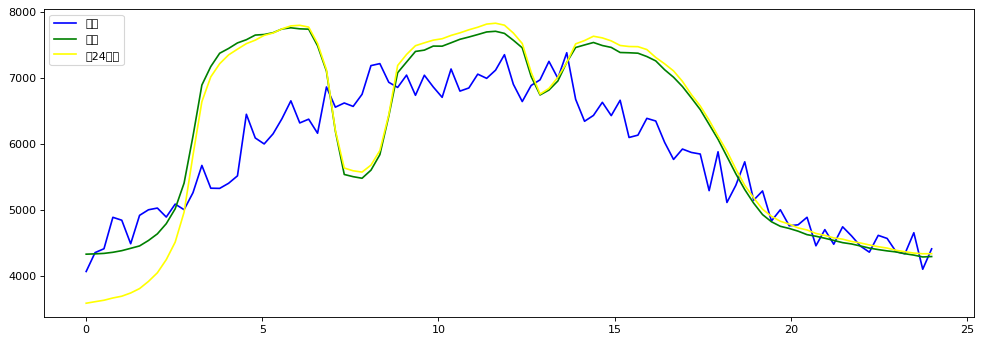

In [69]:
# 调用 `picture` 函数，传入 `test_seq` (测试序列) 和索引 `500`。
# 这将绘制测试集中第 500 个样本的预测负荷曲线，并与真实负荷及前 24 小时负荷进行对比。
picture(test_seq, 500)

预测训练集里的某一样本

预测训练集中的第66000个样本并可视化
###### 调用 picture 函数，对训练集中的第66000个样本进行预测并绘图。

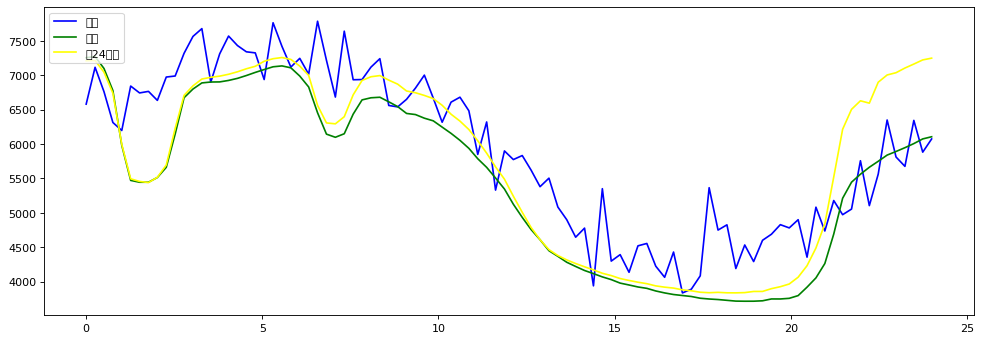

In [70]:
# 调用 `picture` 函数，传入 `train_seq` (训练序列) 和索引 `66000`。
# 这将绘制训练集中第 66000 个样本的预测负荷曲线，并与真实负荷及前 24 小时负荷进行对比。
# 在训练集上进行预测通常用于检查模型是否过拟合或是否能很好地拟合训练数据。
picture(train_seq, 66000)

加载训练好的模型参数

加载训练好的模型参数
###### 从文件中加载预先训练好的模型参数，以便直接进行预测或进一步评估，而无需重新训练。

In [71]:
# 从指定路径加载模型的状态字典 (state_dict)。
# `state_dict` 是一个 Python 字典，存储了模型中所有可学习的参数（权重和偏置）。
# 这允许我们在不重新定义模型结构的情况下加载预训练好的权重。
# `/content/gdrive/MyDrive/ElectricPowerTraining/code/fcnn_5` 是模型参数文件在 Google Drive 上的路径。
fcnn.load_state_dict(torch.load('/content/gdrive/MyDrive/ElectricPowerTraining/code/fcnn_5'))

<All keys matched successfully>

采用所有样本APE的平均值(mean absolute percentage error)MAPE对模型的预测准确度进行评价

APE（绝对百分比误差）：|y预测 - y真实| ÷ y真实 × 100%

定义 APE_list 函数
###### 定义了一个函数 APE_list，用于计算测试集中每个24小时预测的平均绝对百分比误差 (APE)，并返回这些平均 APE 值的列表。

In [72]:
# 定义函数 `APE_list`，用于计算测试集中每个 24 小时（即每个样本）的平均绝对百分比误差 (APE)。
# `test_seq`: 测试序列列表，每个元素是一个包含输入特征和真实标签的元组。
def APE_list(test_seq):  # 返回预测的每个24小时的平均APE组成的列表
    list1 = [] # 初始化一个空列表，用于存储每个样本的平均 APE。
    # 遍历 `test_seq` 中的每一个测试样本。
    for i in test_seq:
        # 使用模型 `fcnn` 对当前样本的输入特征 `i[0]` 进行预测。
        pred = fcnn(i[0])
        # 反归一化真实标签 `i[1]`，将其从 0-1 范围还原到原始负荷值范围。
        # `.numpy()` 将 PyTorch 张量转换为 NumPy 数组。
        true_label = i[1] * (v_max - v_min) + v_min
        true_label = true_label.numpy()
        # 反归一化预测结果 `pred`。
        # `.detach().numpy()`：`.detach()` 从计算图中分离张量，`.numpy()` 转换为 NumPy 数组。
        true_pred = pred * (v_max - v_min) + v_min
        true_pred = true_pred.detach().numpy()
        # 计算当前 24 小时预测的平均 APE。
        # `abs(true_pred - true_label)` 计算绝对误差。
        # `/ true_label` 计算相对误差。
        # `sum(...) / 96` 计算这 96 个预测点的平均相对误差。
        num = sum(abs(true_pred - true_label) / true_label) / 96
        # 将当前样本的平均 APE 添加到 `list1`。
        list1.append(num)

    return list1 # 返回包含所有样本平均 APE 的列表。
# `max(list1), min(list1), list1.index()`：这些是注释掉的示例代码，
# 用于获取列表中 APE 的最大值、最小值以及它们对应的索引，可能用于调试或进一步分析。

在测试数据上的MAPE

在测试数据上计算 MAPE
###### 使用 APE_list 函数计算测试集上的平均绝对百分比误差 (MAPE)，并将其打印和保存。

In [73]:
# 调用 `APE_list` 函数，计算测试集中所有样本的平均 APE，结果存储在 `list1` 中。
list1 = APE_list(test_seq)

# 计算并打印总的 MAPE。
# `sum(list1)` 累加所有样本的平均 APE。
# `len(list1)` 获取样本总数。
# `* 100` 将结果转换为百分比。
# `str(...) + '%'` 将数值格式化为字符串并添加百分号。
str(sum(list1) / len(list1) * 100) + '%'

# 将包含所有样本平均 APE 的列表 `list1` 保存到文件中。
# `np.save()` 函数用于将 NumPy 数组保存为 `.npy` 格式的文件。
# '/content/gdrive/MyDrive/ElectricPowerTraining/code/fcnn_mape' 是保存路径和文件名。
np.save('/content/gdrive/MyDrive/ElectricPowerTraining/code/fcnn_mape', list1)

In [74]:
# 6.603606413932181%    学习率0.01
# 5.305290765717045%
# 5.3464262697033975%
# 5.14127627500452%
# 5.7158051922799915%
# 6.787916712337207%
# 6.644239348950235%
# 5.69550430048835%
# 8.271368299091874%
# 6.929466516301976%
# 5.033682719629707%   学习率0.001
# 5.111268064916269%
# 4.66893587943667%
# 5.607308426536673%
# 4.736420186128316%
# 3.671130233735497%
# 4.529471358337761%
# 4.194013957217647%
# 3.4696171180810023%
# 4.354834724221718%
# 4.402668573521657%
# 3.963668633496546%
# 3.7688639320679154%
# 4.6363068274787835%
# 3.577304760008287%
# 3.6069999537668047%
# 3.4939624582452438%
# 3.510677293122402%
# 3.5191873838763934%
# 3.371155724122247%   学习率0.0001
# 3.2396765017178573%
# 3.1312434051535534%
# 3.218598760194548%
# 3.1202429503717695%
# 3.1370015644698372%
# 2.9958810460580594%
# 2.9824408010238823%
# 3.1413491746402094%
# 3.1052736001067767%
# 3.016649604364203%
# 3.158469020480509%
# 3.189437748473799%
# 3.033976786304351%
# 2.971539336320524%
# 2.9965918989233247%  学习率0.00001
# 2.9667725922817083%
# 2.972823514175659%
# 2.9885393344417883%
# 2.971978000134556%
# 2.963206226104105%  fcnn_5
# 2.9794356459394766%

保存当前模型的状态字典
###### 将当前训练好的模型 fcnn 的参数保存到文件中，以便将来加载和使用。

In [75]:
# 将当前训练好的模型 `fcnn` 的状态字典保存到指定路径。
# `fcnn.state_dict()` 获取模型的所有可学习参数（权重和偏置）的字典。
# `torch.save()` 用于将 PyTorch 对象序列化并保存到磁盘。
# '/content/gdrive/MyDrive/ElectricPowerTraining/code/fcnn_5' 是保存模型参数的文件路径和名称。
# 这使得模型可以被重新加载，而无需重新训练。
torch.save(fcnn.state_dict(), '/content/gdrive/MyDrive/ElectricPowerTraining/code/fcnn_5')

测试数据的APE分布的箱线图

绘制 APE 分布箱线图 (基本版)
###### 使用 Seaborn 绘制了测试集 APE 值的箱线图。

<Axes: >

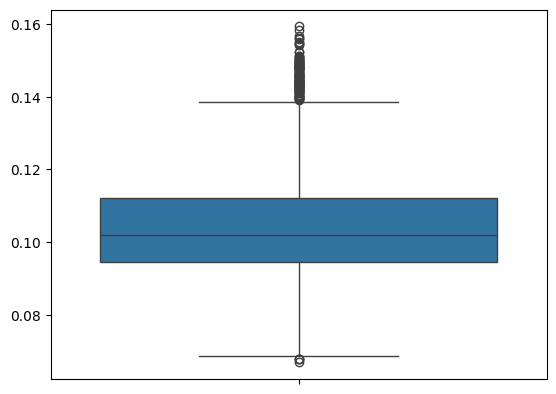

In [76]:
# 使用 Seaborn 库的 `boxplot()` 函数绘制 `list1` (包含所有样本平均 APE) 的箱线图。
# 箱线图用于可视化数据分布的中心趋势、离散程度以及异常值。
sns.boxplot(data=list1)

绘制 APE 分布箱线图 (带 Y 轴限制)
###### 再次绘制 APE 的箱线图，但设置了 Y 轴的显示范围，以更好地聚焦于误差的主要分布区间

(0.0, 0.06)

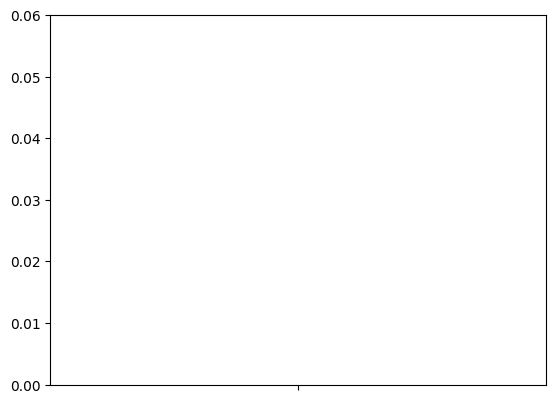

In [77]:
# 再次使用 Seaborn 的 `boxplot()` 函数绘制 `list1` 的箱线图。
sns.boxplot(data=list1)
# 设置 Y 轴的显示范围。
# `plt.ylim(0, 0.06)` 将 Y 轴的范围限制在 0 到 0.06 (即 0% 到 6%) 之间。
# 这有助于排除极端异常值，更清晰地观察大多数 APE 的分布情况。
plt.ylim(0, 0.06)

In [78]:
# 计算并打印 `list1` 中所有元素的最小值。
min(list1)
# 计算并打印 `list1` 中所有元素的最大值。
max(list1)

np.float32(0.15941407)

测试数据的APE分布的折线图

绘制 APE 分布的折线图
###### 绘制了测试集每个样本平均 APE 值的折线图，展示了 APE 随样本索引的变化趋势。

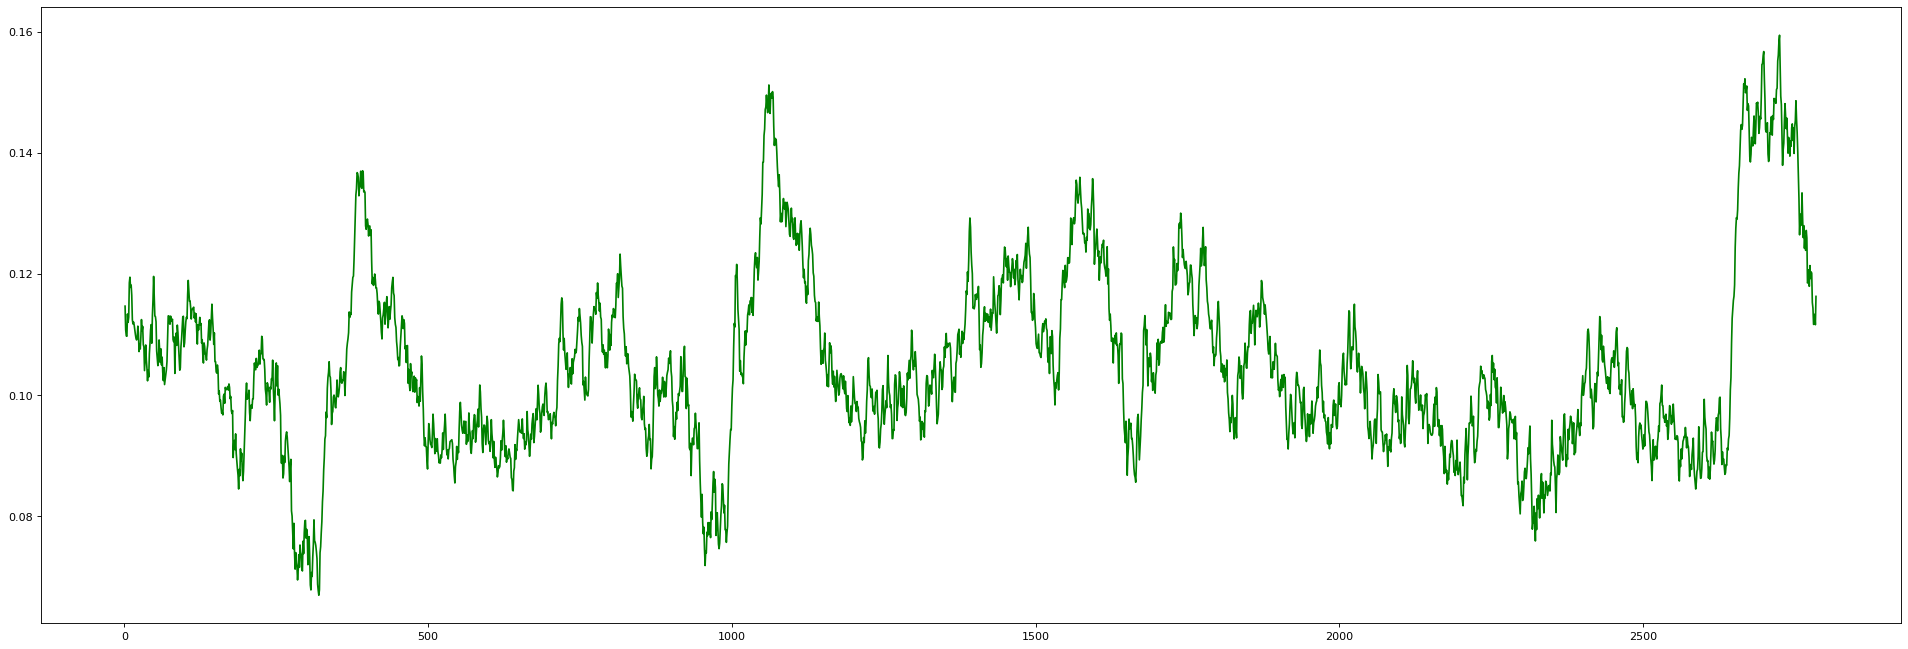

In [79]:
# 创建一个新的 Matplotlib 图形。
# `figsize` 设置图表大小为 30x10 英寸，`dpi` 设置分辨率为 80。
plt.figure(figsize=(30, 10), dpi=80)

# 生成 X 轴数据。
# `np.linspace(1, 2785, len(list1), endpoint=True)` 在 1 到 2785 之间均匀生成与 `list1` 长度相同的点。
# 2785 可能是测试样本的总数，或者代表一个特定的范围。
X = np.linspace(1, 2785, len(list1), endpoint=True)
# 绘制折线图。
# X 轴为生成的序列点，Y 轴为 `list1` 中的 APE 值。曲线颜色设置为绿色。
plt.plot(X, list1, color='green')
# 显示绘制的图形。
plt.show()

2023年12月30日的预测误差较大，观察12月30日的数据发现，这天为周五，气象数据未发现异常，且不是节假日，12月31日才是元旦假期，但负荷相较前一天出现了明显的下降，推测这是
导致误差较大的原因。

除去误差较大的预测结果后

截取 APE 列表并重新计算 MAPE
###### 从 list1 中截取一部分数据（移除尾部被认为是误差较大的部分），并重新计算截取后的平均 MAPE。

In [80]:
# 截取 `list1` 列表，创建一个新的列表 `list2`。
# `list1[:2600]` 表示从 `list1` 的开头到索引 2599（不包含 2600）的所有元素。
# 这意味着去除了 `list1` 尾部一些被认为误差较大的样本。
list2 = list1[:2600]

# 计算并打印截取后列表 `list2` 的平均 MAPE。
# 与之前计算 MAPE 的方式相同，但现在基于 `list2`。
str(sum(list2) / len(list2) * 100) + '%'

'10.295437%'

绘制截取后 APE 分布的箱线图 (基本版)
###### 此代码块使用 Seaborn 绘制截取后 APE 值 (list2) 的箱线图。

<Axes: >

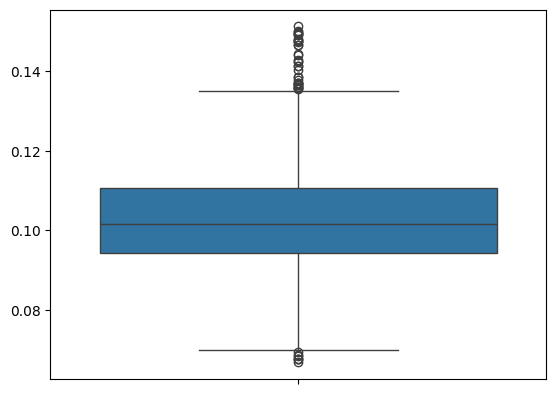

In [81]:
# 使用 Seaborn 的 `boxplot()` 函数绘制 `list2` 的箱线图。
# `list2` 是移除了部分高误差样本后的 APE 列表。
sns.boxplot(data=list2)

绘制截取后 APE 分布的箱线图 (带 Y 轴限制)
###### 再次绘制截取后 APE 的箱线图，并设置 Y 轴的显示范围，以便更好地观察其分布。

(0.0, 0.06)

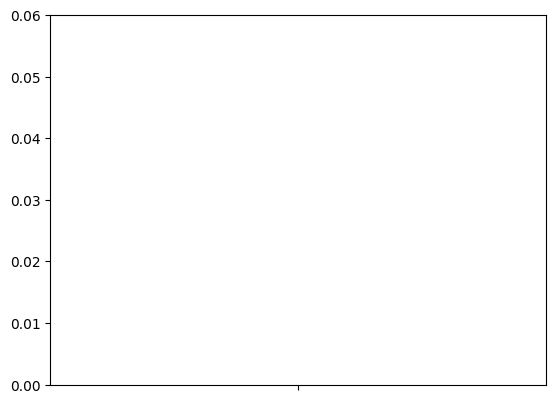

In [82]:
# 再次使用 Seaborn 的 `boxplot()` 函数绘制 `list2` 的箱线图。
sns.boxplot(data=list2)
# 设置 Y 轴的显示范围为 0 到 0.06 (即 0% 到 6%)。
# 这有助于更清晰地展示经过误差过滤后的 APE 分布。
plt.ylim(0, 0.06)

绘制截取后 APE 分布的折线图
###### 此代码块绘制了截取后 APE 值 (list2) 的折线图，展示了其趋势。

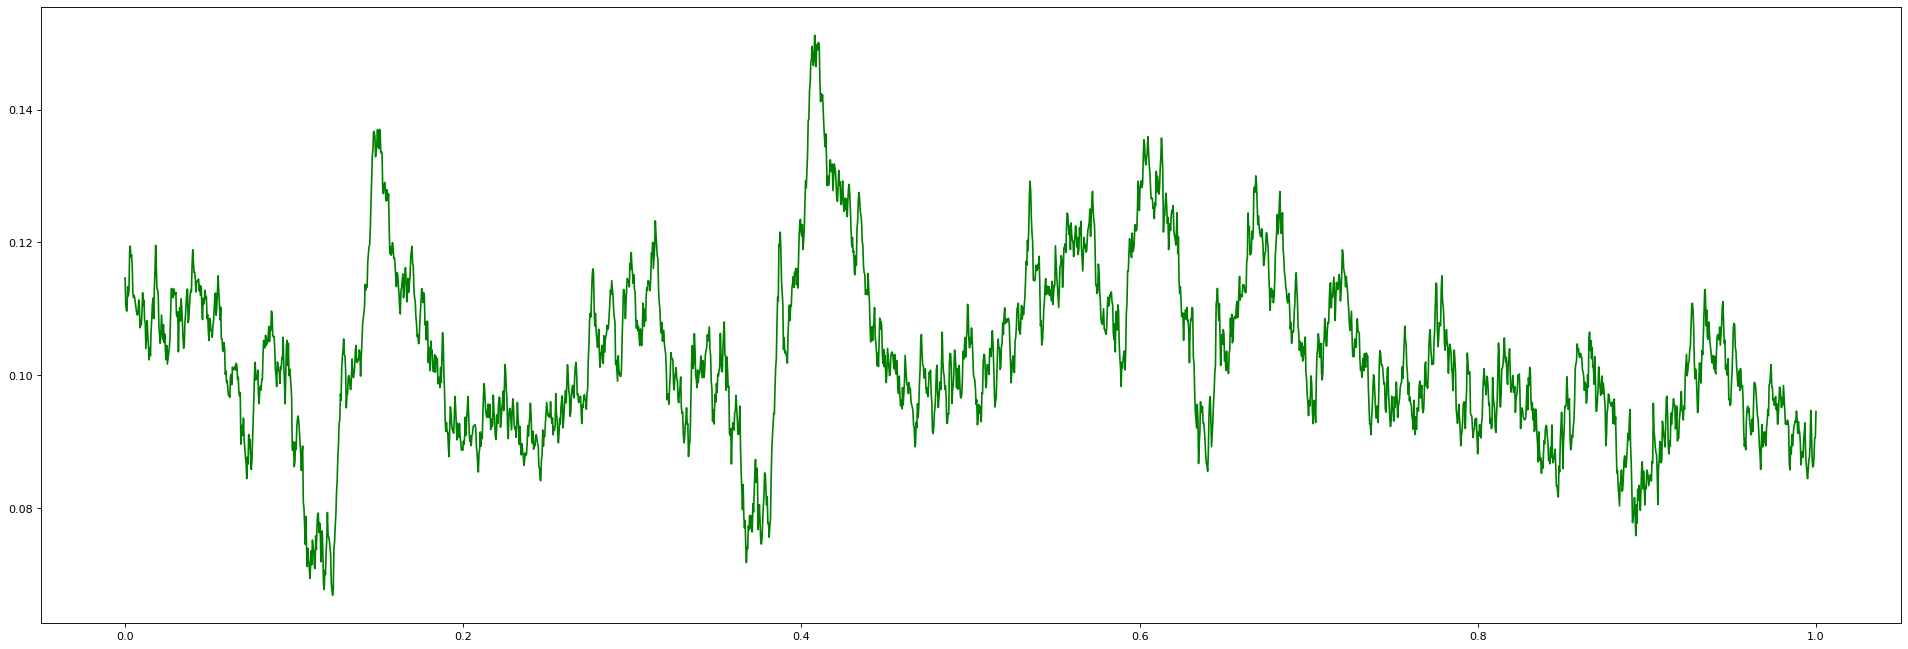

In [83]:
# 创建一个新的 Matplotlib 图形。
plt.figure(figsize=(30, 10), dpi=80)

# 生成 X 轴数据。
# `np.linspace(0, 1, len(list2), endpoint=True)` 在 0 到 1 之间均匀生成与 `list2` 长度相同的点。
# 这里的 X 轴可能只是一个比例尺，没有具体的物理意义，主要用于展示 APE 的序列变化。
X = np.linspace(0, 1, len(list2), endpoint=True)
# 绘制折线图。
plt.plot(X, list2, color='green')
# 显示绘制的图形。
plt.show()

训练过程中在训练集上损失(MSE)的折线图（以小批量为单位）

打印损失列表的统计信息
###### 打印了在训练过程中记录的 loss_list (每个批次的损失) 的最大值、最小值和第一个值。

In [84]:
# 打印 `loss_list` (存储每个训练批次损失的列表) 中的最大值。
max(loss_list)
# 打印 `loss_list` 中的最小值。
min(loss_list)
# 打印 `loss_list` 中的第一个损失值，这通常是训练开始时的初始损失。
loss_list[0]

tensor(0.3136)

计算每个 epoch 的批次数量
###### 此代码块计算了在训练过程中每个 epoch 的批次数量。

In [85]:
# 计算每个 epoch 的批次数量。
# `len(loss_list)` 是训练过程中总的批次数量（因为每个批次都记录了损失）。
# `521` 是代码中隐含的一个常量，如果 `epochs = 1`，那么 `521` 应该就是总的批次数量。
# 如果 `epochs > 1`，这个计算结果将是每个 epoch 的平均批次数量。
len(loss_list) / 521

1.0

绘制训练损失折线图 (全范围)
###### 此代码块绘制了训练过程中每个批次损失值的折线图，展示了损失随训练进行的下降趋势。

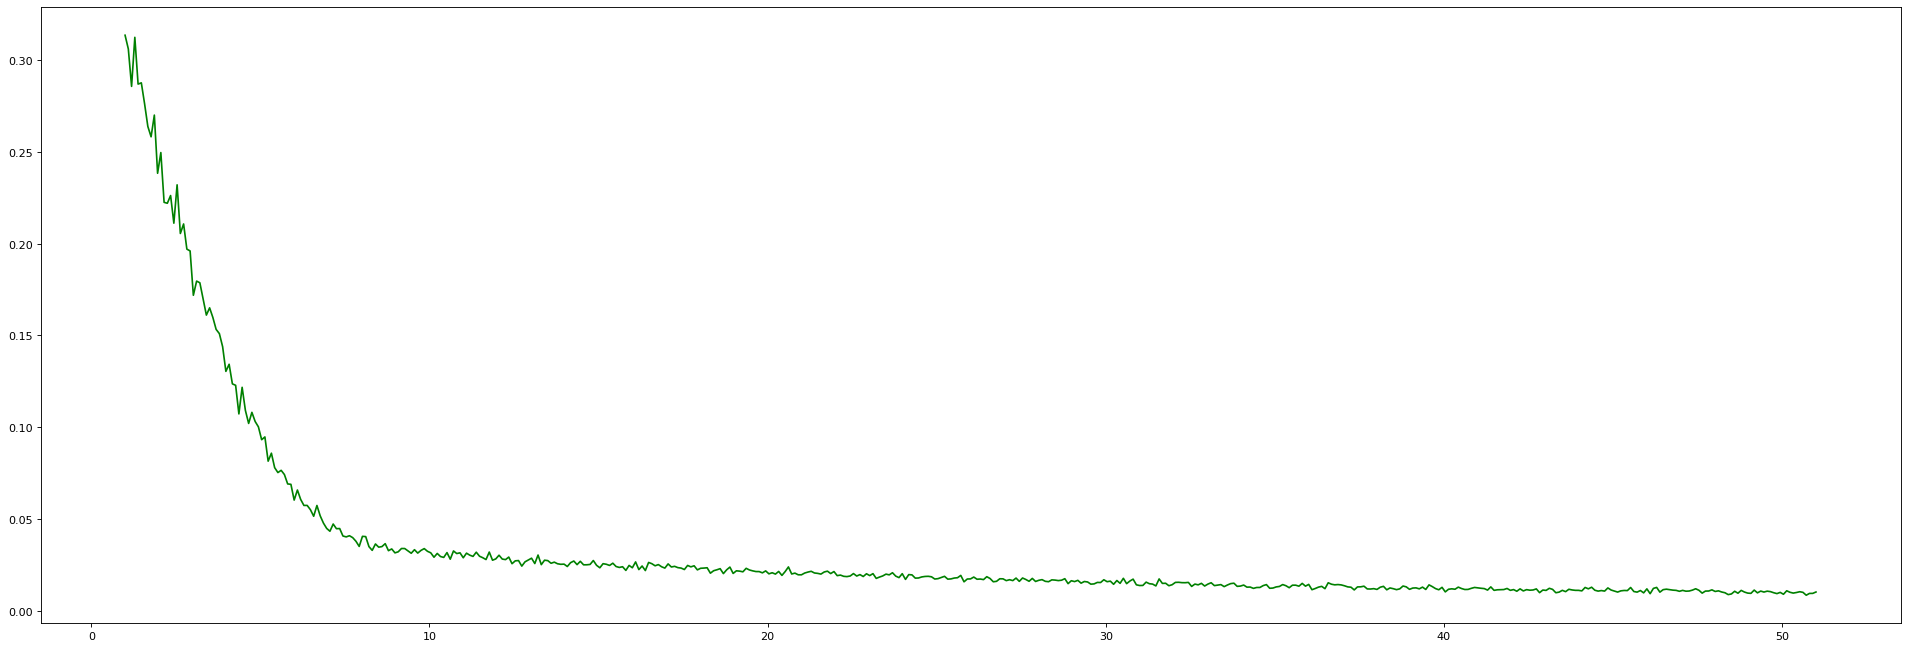

In [86]:
# 创建一个新的 Matplotlib 图形。
plt.figure(figsize=(30, 10), dpi=80)

# 生成 X 轴数据。
# `np.linspace(1, 51, len(loss_list), endpoint=True)` 在 1 到 51 之间均匀生成与 `loss_list` 长度相同的点。
# 这里的 51 可能是指训练的总批次数量，或者一个用于 X 轴刻度的特定值。
X = np.linspace(1, 51, len(loss_list), endpoint=True)
# 绘制折线图。
# X 轴为生成的序列点，Y 轴为 `loss_list` 中的损失值。曲线颜色设置为绿色。
plt.plot(X, loss_list, color='green')
# 显示绘制的图形。
plt.show()

 绘制训练损失折线图 (Y 轴范围 0 到 0.35)
 ###### 此代码块绘制了训练损失的折线图，并将 Y 轴的显示范围限制在 0 到 0.35 之间，以更清晰地观察损失下降的早期阶段。

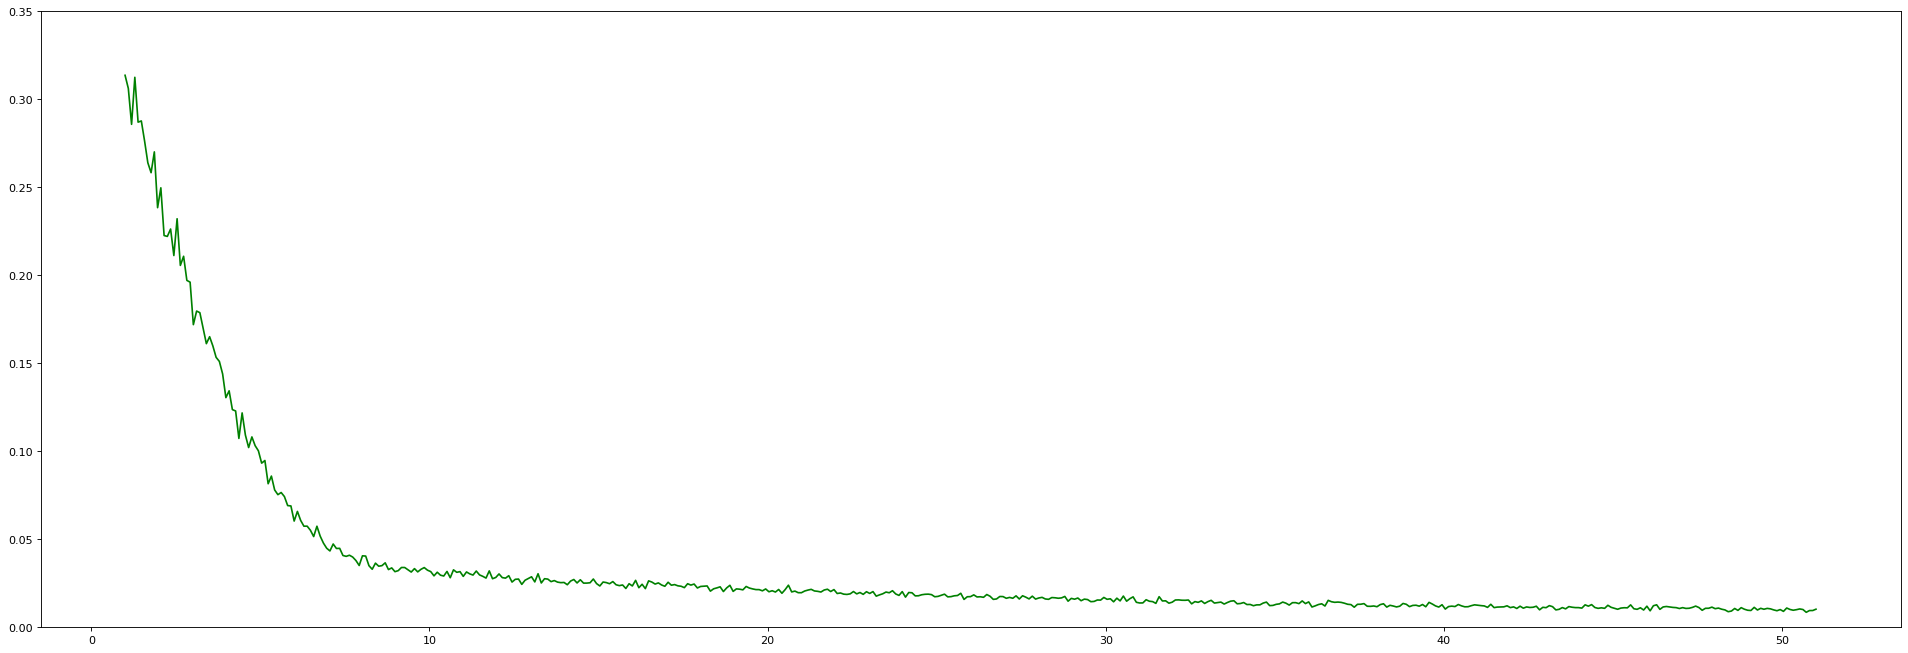

In [87]:
# 创建一个新的 Matplotlib 图形。
plt.figure(figsize=(30, 10), dpi=80)

# 生成 X 轴数据（同上）。
X = np.linspace(1, 51, len(loss_list), endpoint=True)
# 绘制折线图。
plt.plot(X, loss_list, color='green')
# 设置 Y 轴的显示范围为 0 到 0.35。
plt.ylim(0, 0.3500)
# 显示绘制的图形。
plt.show()

绘制训练损失折线图 (Y 轴范围 0 到 0.04)
###### 此代码块绘制了训练损失的折线图，并将 Y 轴的显示范围进一步限制在 0 到 0.04 之间，以便观察损失收敛的后期阶段。

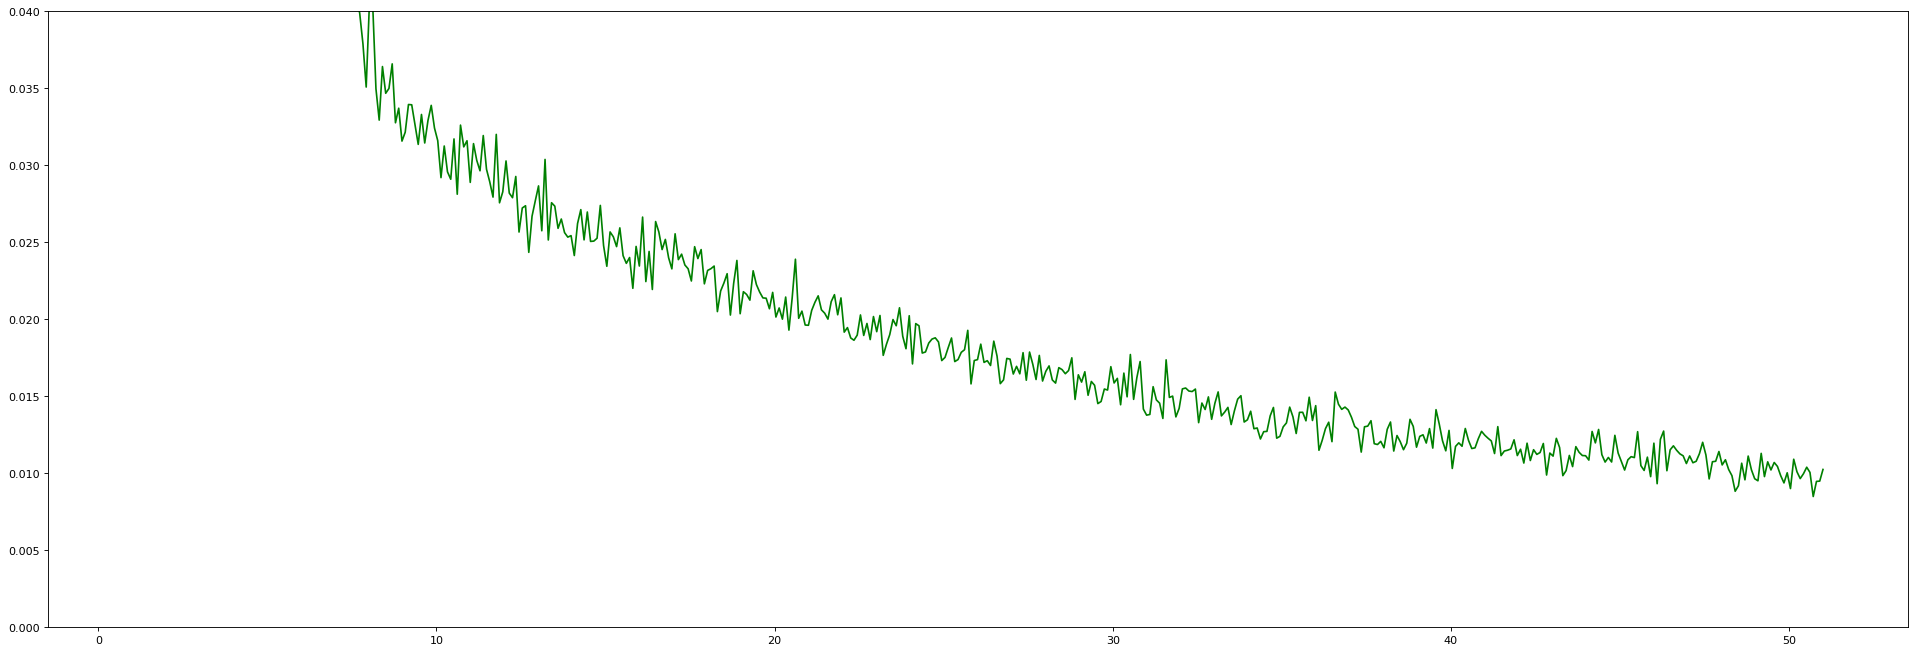

In [88]:
# 创建一个新的 Matplotlib 图形。
plt.figure(figsize=(30, 10), dpi=80)

# 生成 X 轴数据（同上）。
X = np.linspace(1, 51, len(loss_list), endpoint=True)
# 绘制折线图。
plt.plot(X, loss_list, color='green')
# 设置 Y 轴的显示范围为 0 到 0.04。
plt.ylim(0, 0.0400)
# 显示绘制的图形。
plt.show()

绘制训练损失折线图 (Y 轴范围 0 到 0.01)
###### 此代码块绘制了训练损失的折线图，并将 Y 轴的显示范围限制在 0 到 0.01 之间，以最精细的粒度观察损失最终的收敛情况。

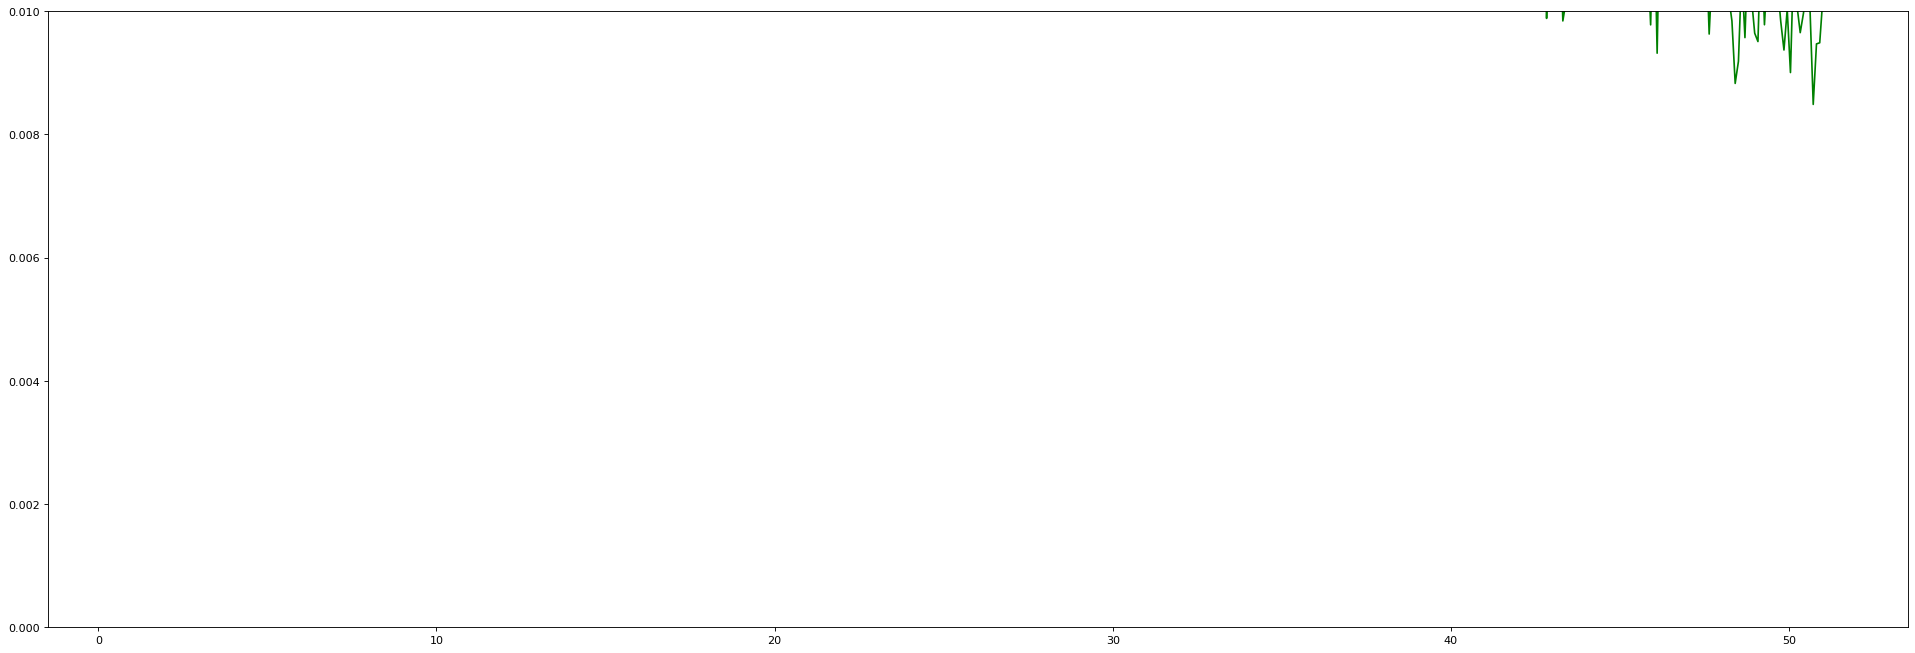

In [89]:
# 创建一个新的 Matplotlib 图形。
plt.figure(figsize=(30, 10), dpi=80)

# 生成 X 轴数据（同上）。
X = np.linspace(1, 51, len(loss_list), endpoint=True)
# 绘制折线图。
plt.plot(X, loss_list, color='green')
# 设置 Y 轴的显示范围为 0 到 0.01。
plt.ylim(0, 0.0100)
# 显示绘制的图形。
plt.show()

 考虑之后用前一个星期的数据，因为负荷在一天内和一周内变化情况有较明显的规律

 考虑将要预测的第一个时刻的特征和预测时刻前24小时的那个时刻的负荷组成一个序列，预测的第二个时刻的特征和预测时刻前24小时的那个时刻的负荷组成
 一个序列......，最终一个样本有96个序列，分别对应要预测的96个时刻。就像实训2-9那样。
 考虑新增一个特征：是否为休息日（或工作日），并将节假日的调休去掉。